In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_json('pokedex.json')

In [3]:
df

,pokemon
0,"{'id': 1, 'num': '001', 'name': 'Bulbasaur', '..."
1,"{'id': 2, 'num': '002', 'name': 'Ivysaur', 'im..."
2,"{'id': 3, 'num': '003', 'name': 'Venusaur', 'i..."
3,"{'id': 4, 'num': '004', 'name': 'Charmander', ..."
4,"{'id': 5, 'num': '005', 'name': 'Charmeleon', ..."
...,...
146,"{'id': 147, 'num': '147', 'name': 'Dratini', '..."
147,"{'id': 148, 'num': '148', 'name': 'Dragonair',..."
148,"{'id': 149, 'num': '149', 'name': 'Dragonite',..."
149,"{'id': 150, 'num': '150', 'name': 'Mewtwo', 'i..."


In [4]:
import json
# load data using Python JSON module
with open('pokedex.json','r') as f:
    data = json.loads(f.read())
# Flatten data
df_nested_list = pd.json_normalize(data, record_path =['pokemon'])

In [103]:
df_nested_list

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.84]","[Ice, Dragon, Fairy]","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"[Ice, Dragon, Fairy]","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,None,"[Ice, Rock, Dragon, Fairy]",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,N/A,None,"[Bug, Ghost, Dark]",NaN,NaN


In [7]:
df_nested_list.to_csv('EPD2.xls',index=False)

**Query-1 : Get all Pokemons whose spawn rate is less than 5%**

In [8]:
df_nested_list.describe()

,id,candy_count,spawn_chance,avg_spawns
count,151.000000,70.000000,151.000000,151.000000
mean,76.000000,57.300000,0.731985,53.992603
std,43.734045,48.897512,1.956376,111.156064
min,1.000000,12.000000,0.000000,0.000000
25%,38.500000,31.250000,0.015500,1.450000
50%,76.000000,50.000000,0.074000,7.200000
75%,113.500000,50.000000,0.620000,55.000000
max,151.000000,400.000000,15.980000,712.000000


In [26]:
df3 = df_nested_list['avg_spawns']<5

In [48]:
df3.loc[df_nested_list['avg_spawns']<5]

1      True
2      True
4      True
5      True
7      True
       ... 
145    True
147    True
148    True
149    True
150    True
Name: avg_spawns, Length: 67, dtype: bool

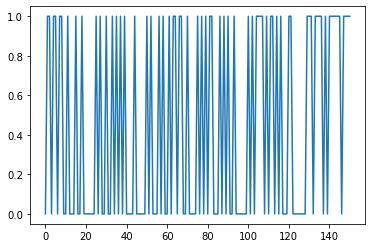

In [57]:
plt.plot(df_nested_list["avg_spawns"]<5)

**Query-2 : Get all Pokemons that have less than 4 weaknesses**

In [66]:
df4 = df_nested_list['weaknesses']

In [9]:
list = df_nested_list['weaknesses'].size

In [10]:
print(list)

151


In [96]:

weak_count = df_nested_list[["weaknesses","count"]]

In [97]:
weak_count

,weaknesses,count
0,"[Fire, Ice, Flying, Psychic]",4
1,"[Fire, Ice, Flying, Psychic]",4
2,"[Fire, Ice, Flying, Psychic]",4
3,"[Water, Ground, Rock]",3
4,"[Water, Ground, Rock]",3
...,...,...
146,"[Ice, Dragon, Fairy]",3
147,"[Ice, Dragon, Fairy]",3
148,"[Ice, Rock, Dragon, Fairy]",4
149,"[Bug, Ghost, Dark]",3


In [67]:
df4

0      [Fire, Ice, Flying, Psychic]
1      [Fire, Ice, Flying, Psychic]
2      [Fire, Ice, Flying, Psychic]
3             [Water, Ground, Rock]
4             [Water, Ground, Rock]
                   ...             
146            [Ice, Dragon, Fairy]
147            [Ice, Dragon, Fairy]
148      [Ice, Rock, Dragon, Fairy]
149              [Bug, Ghost, Dark]
150              [Bug, Ghost, Dark]
Name: weaknesses, Length: 151, dtype: object

In [31]:
df_nested_list['count'] = df_nested_list['weaknesses'].str.count(',').add(1)

In [43]:
df_nested_list['count'] = df_nested_list.loc[df_nested_list['weaknesses'].notna(), 'weaknesses'] \
                .astype(str).str.split(',').str.len() \
                .reindex(df.index, fill_value=0)

In [44]:
df_nested_list

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,count
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.84]","[Ice, Dragon, Fairy]","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN,3
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"[Ice, Dragon, Fairy]","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]",3
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,None,"[Ice, Rock, Dragon, Fairy]",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1...",4
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,N/A,None,"[Bug, Ghost, Dark]",NaN,NaN,3


In [49]:
df4 = df_nested_list['count']<4

In [61]:
df4.loc[df4]

3      True
4      True
5      True
6      True
7      True
       ... 
145    True
146    True
147    True
149    True
150    True
Name: count, Length: 102, dtype: bool

**explanation - Hence from the above output we can say that there 102 pokemon who have weaknesses as less than 4 among total of 152** 

<AxesSubplot:>

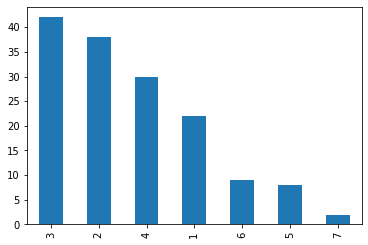

In [75]:
df_nested_list['count'].value_counts().plot(kind='bar')

<AxesSubplot:>

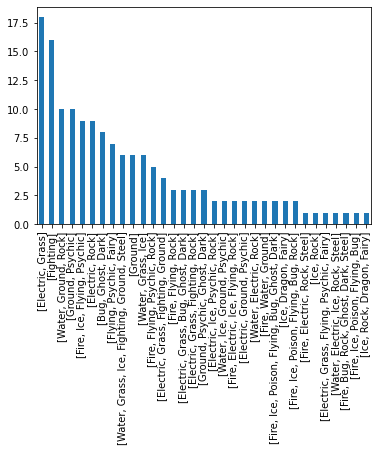

In [85]:
df_nested_list['weaknesses'].value_counts().plot(kind='bar')

**Query-3 : Get all Pokemons that have no multipliers at all**

In [134]:

none_values = df_nested_list[["multipliers"]].isnull()

In [143]:
none_values.loc[none_values["multipliers"]]

,multipliers
2,True
5,True
8,True
11,True
14,True
...,...
144,True
145,True
148,True
149,True


**Hence by looking into above output we can conclude that there are 81 pokemons who have no multipliers at all**

<AxesSubplot:>

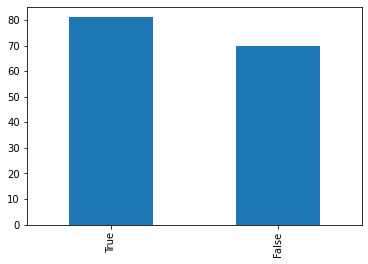

In [146]:
none_values['multipliers'].value_counts().plot(kind='bar')

**Query-4 - Get all Pokemons that do not have more than 2 evolutions**

In [149]:
df5 = df_nested_list[["next_evolution","prev_evolution"]]

In [157]:
df5['count'] = [sum('num' in d for d in x.get('data',[]))
                         if pd.notna(x) else 0
                         for x in df['next_evolution']]

,next_evolution,prev_evolution,count
0,"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4
1,"[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",2
2,NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",0
3,"[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,4
4,"[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",2
...,...,...,...
146,"[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN,4
147,"[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]",2
148,NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1...",0
149,NaN,NaN,0


In [164]:
df6 = df5.loc[df5["count"] == 2]

In [165]:
df6

,next_evolution,prev_evolution,count
1,"[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",2
4,"[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",2
7,"[{'num': '009', 'name': 'Blastoise'}]","[{'num': '007', 'name': 'Squirtle'}]",2
10,"[{'num': '012', 'name': 'Butterfree'}]","[{'num': '010', 'name': 'Caterpie'}]",2
13,"[{'num': '015', 'name': 'Beedrill'}]","[{'num': '013', 'name': 'Weedle'}]",2
16,"[{'num': '018', 'name': 'Pidgeot'}]","[{'num': '016', 'name': 'Pidgey'}]",2
18,"[{'num': '020', 'name': 'Raticate'}]",NaN,2
20,"[{'num': '022', 'name': 'Fearow'}]",NaN,2
22,"[{'num': '024', 'name': 'Arbok'}]",NaN,2
24,"[{'num': '026', 'name': 'Raichu'}]",NaN,2


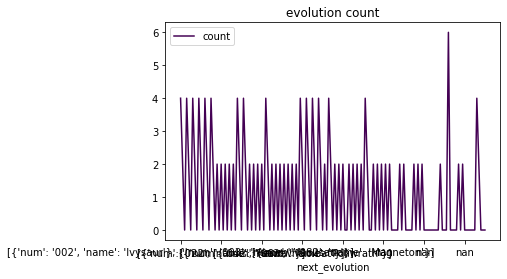

In [171]:
df5.plot(x='next_evolution', title = 'evolution count', colormap = 'viridis');

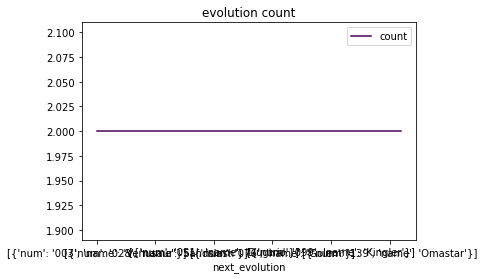

In [172]:
df6.plot(x='next_evolution', title = 'evolution count', colormap = 'viridis');

The above two graphs depicts that the evolution count which has exactly 2 values is shown as a straight line whereas more than two values and none values are shown in the first graph.

**Query-5 : Get all Pokemons whose spawn time is less than 300 seconds.**

In [194]:
df7 = df_nested_list['spawn_time']

In [191]:
df_nested_list['spawn_time'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
146    False
147    False
148    False
149    False
150    False
Name: spawn_time, Length: 151, dtype: bool

In [193]:
df_nested_list.dropna(subset=['spawn_time'], inplace = True)

In [200]:
df_nested_list

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.84]","[Ice, Dragon, Fairy]","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"[Ice, Dragon, Fairy]","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,None,"[Ice, Rock, Dragon, Fairy]",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,N/A,None,"[Bug, Ghost, Dark]",NaN,NaN


In [ ]:
df7

In [7]:
filtered_df = df_nested_list.loc[(df_nested_list['spawn_time'] < '05:00')
                     & (df_nested_list['spawn_time'] < '05:00')]
# Display
filtered_df[["name","spawn_time"]]

,name,spawn_time
6,Squirtle,04:25
8,Blastoise,00:06
10,Metapod,02:11
12,Weedle,02:21
13,Kakuna,02:30
...,...,...
127,Tauros,00:37
129,Gyarados,02:15
134,Jolteon,02:30
136,Porygon,02:49


explanation - Hence there are 75 pokemons whose spawn time is less than 300 seconds which means 5 minutes.

**Query-6 : Get all Pokemon who have more than two types of capabilities**

In [10]:
df8 = df_nested_list["type"]

In [13]:
df8['count'] = df_nested_list.loc[df_nested_list['type'].notna(), 'type'] \
                .astype(str).str.split(',').str.len() \
                .reindex(df.index, fill_value=0)

In [21]:
df8

0                                          [Grass, Poison]
1                                          [Grass, Poison]
2                                          [Grass, Poison]
3                                                   [Fire]
4                                                   [Fire]
                               ...                        
147                                               [Dragon]
148                                       [Dragon, Flying]
149                                              [Psychic]
150                                              [Psychic]
count    0      2
1      2
2      2
3      1
4      1
 ...
Name: type, Length: 152, dtype: object

<AxesSubplot:>

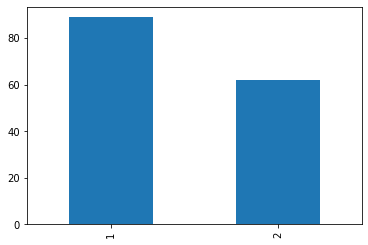

In [23]:
df8['count'].value_counts().plot(kind='bar')

In [ ]:
There are no pokemon who have more than 2 types of capabilities.